In [260]:
import json
import matplotlib.pyplot as plt
import numpy as np
import random

In [261]:
applePrices = open('./data/AAPL.json')
applePricesArray = json.load(applePrices)

In [262]:
def supportAndResistance(stockArray, force=3):
    hashMap = {}
    for price in list(map(int, stockArray)):
        if price not in hashMap:
            hashMap[price] = 1
        else:
            hashMap[price] += 1

    piceList = list(hashMap.keys())

    for supportOrResistance in piceList:
        if hashMap[supportOrResistance] < force:
            del hashMap[supportOrResistance]
    return  list(hashMap.keys())
    
def get_next_low_high(arr, x):
  # Sort the array in ascending order
  arr.sort()
  
  # Initialize variables to store the next low and high values
  next_low = None
  next_high = None
  
  # Find the next low value
  for i in range(len(arr)):
    if arr[i] < x:
      next_low = arr[i]
    else:
      break
  
  # Find the next high value
  for i in range(len(arr)-1, -1, -1):
    if arr[i] > x:
      next_high = arr[i]
    else:
      break
  
  return {"low": next_low, "high" :next_high}


def percentageDifference(a, b):
  return int(abs((a - b) / ((a + b) / 2)) * 100)

def shouldByOrSell(price, support, resistance):
  supportDiff = percentageDifference(price, support)
  resistanceDiff = percentageDifference(price, resistance)
  if supportDiff > resistanceDiff * 3:
    return 'buy'
  elif supportDiff > resistanceDiff:
    return 'sell'
  else:
    return 'hold'
    

{None, 132}


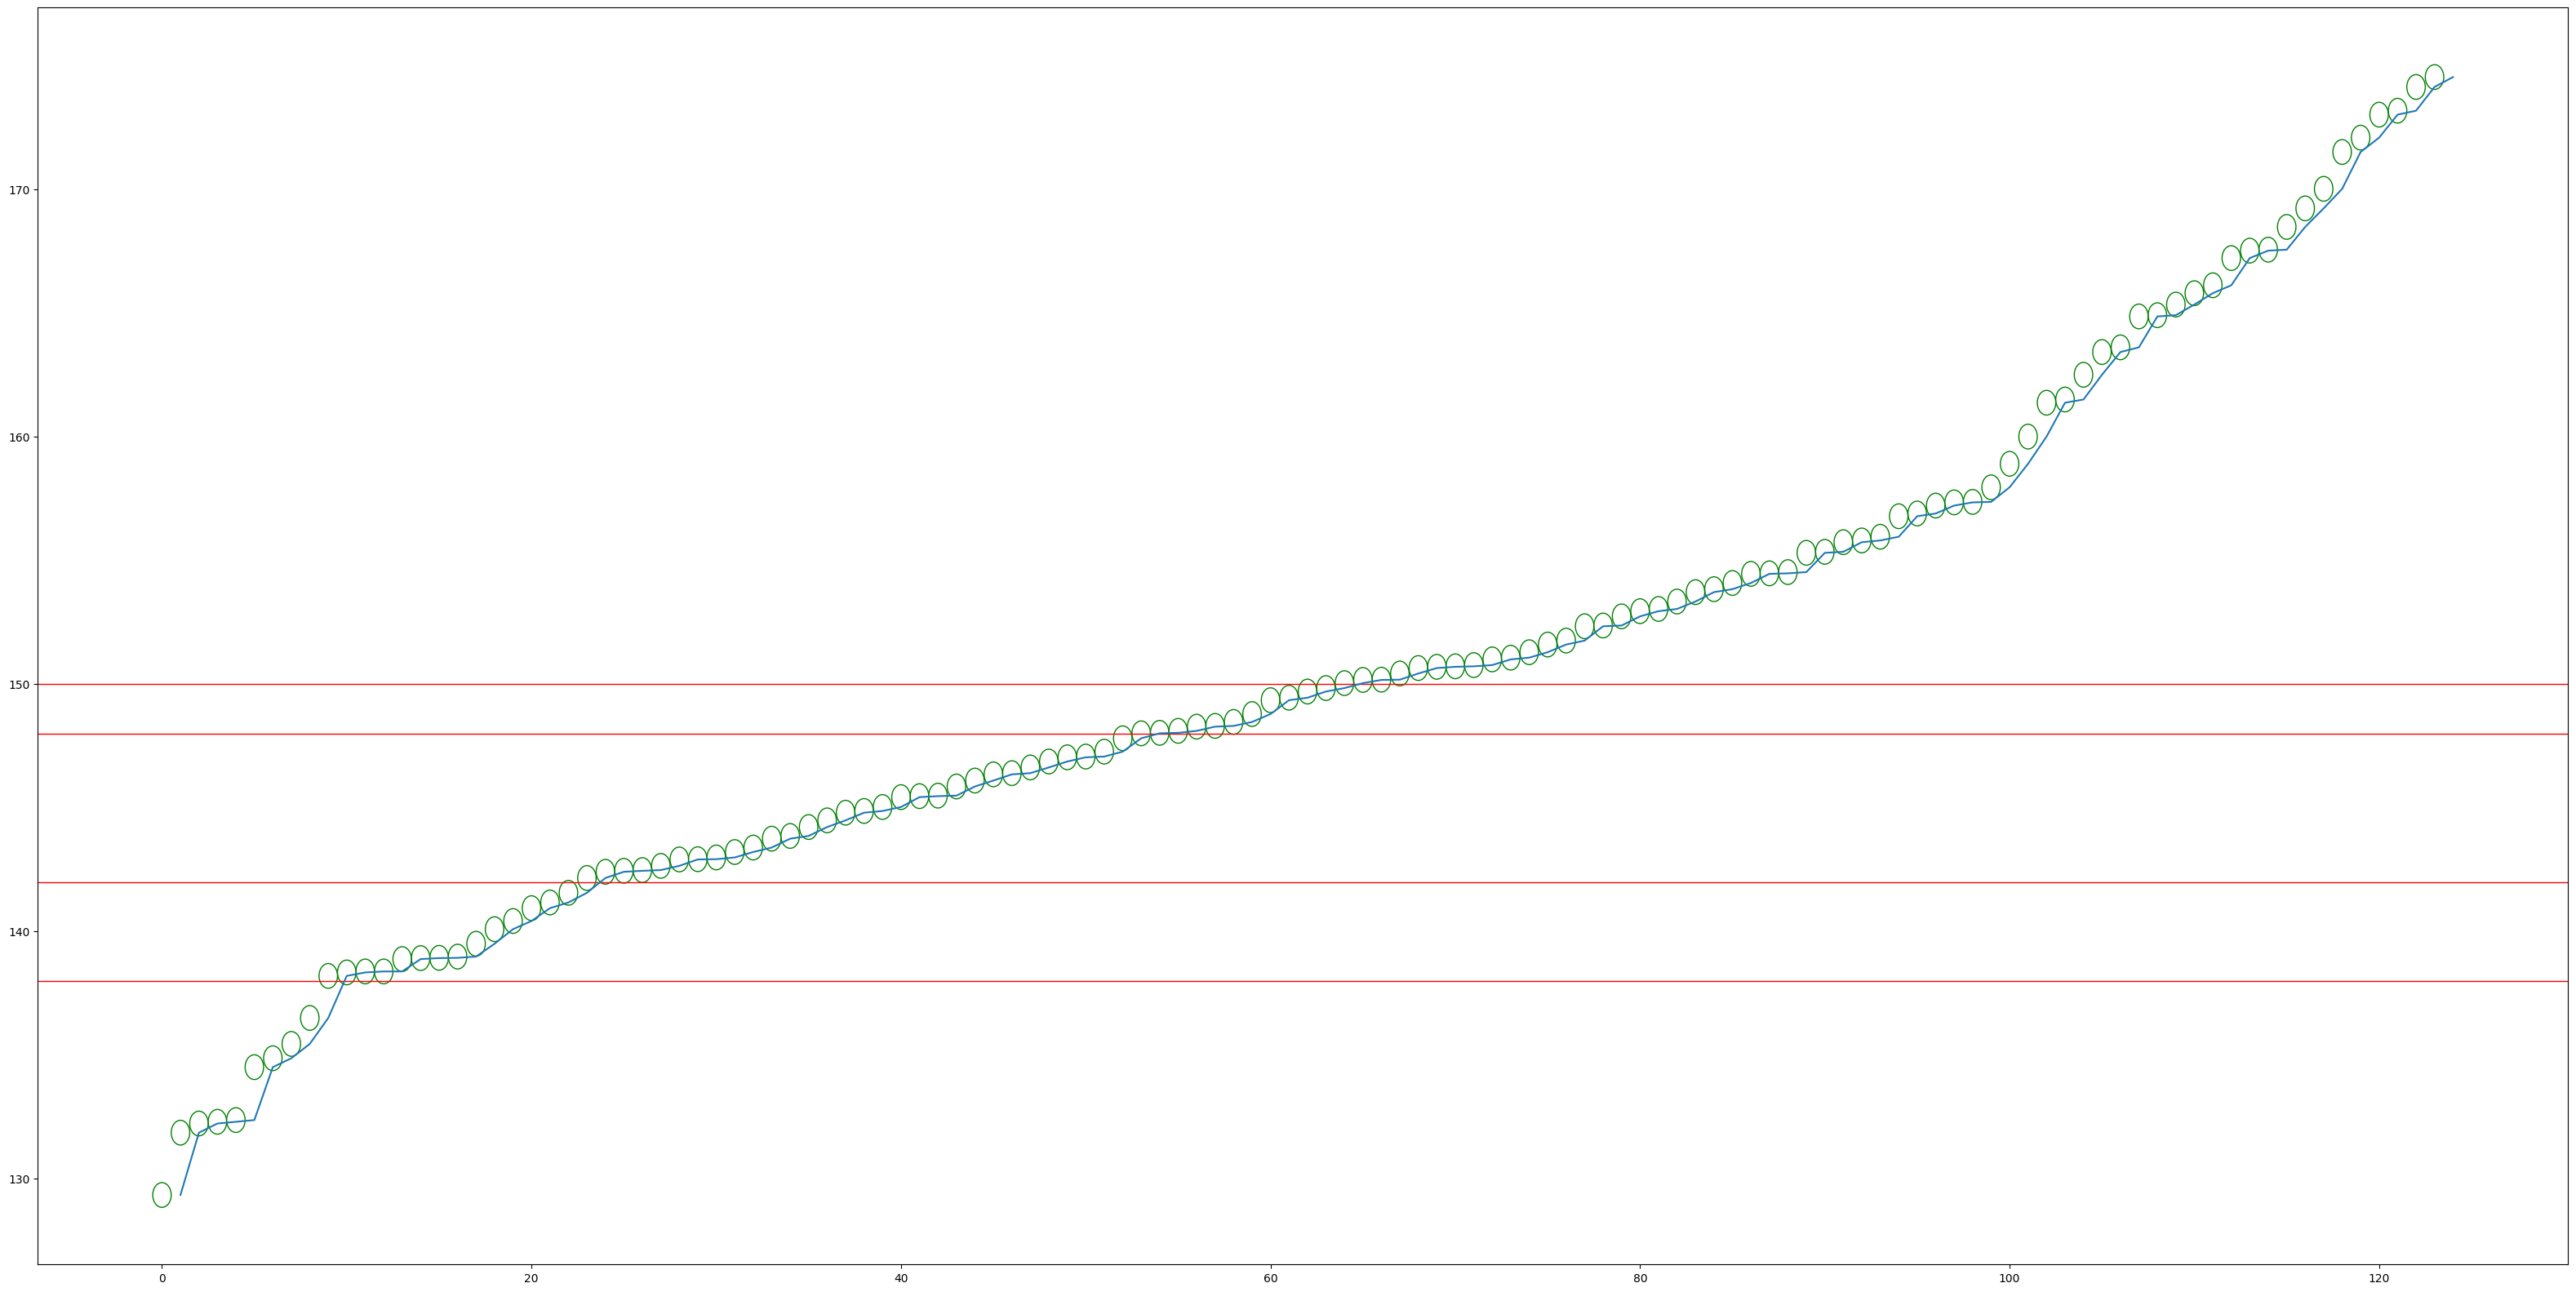

In [266]:
xpoints = np.array(list(range(1,len(applePricesArray) +1)))
ypoints = np.array(applePricesArray)

print(get_next_low_high(supportAndResistance(applePricesArray), price))

for sr in supportAndResistance(applePricesArray, 6):
    plt.axhline(y = sr, color = 'r', linestyle = '-', linewidth = 1)

for price, idx in enumerate(applePricesArray):

    # print(shouldByOrSell(price, next_low, next_high))
    circle1 = plt.Circle((price, idx), .5, color='g', fill=False)
    plt.gca().add_patch(circle1)

plt.rcParams["figure.figsize"] = (40,20)
plt.plot(xpoints, ypoints)
plt.show()